**EMPLOYEE BURNOUT PREDICTION**

---





**IMPORTING NECESSARY LIBRARIES**

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

**LOADING THE DATASET**

In [111]:
data=pd.read_excel("/content/employee_burnout_analysis-AI.xlsx")

**DATA OVERVIEW**

In [112]:
data.shape

(22750, 9)

In [113]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [114]:
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [115]:
data.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

**EXPLONATORY DATA ANALYSIS**

---

Here Employee ID is Unique for every row so we can drop it

In [116]:
data=data.drop("Employee ID",axis=1)

In [117]:
data.isnull().sum()

Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [118]:
data.isnull().sum().values.sum()

4622


There are NULL values on our target Burn Rate column. Therefore,this 1124 rows needed to be removed.


In [119]:
missing_target_rows = data.loc[data['Burn Rate'].isna(), :].index
data = data.drop(missing_target_rows, axis=0).reset_index(drop=True)

In [120]:
data.isnull().sum()

Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1278
Mental Fatigue Score    1945
Burn Rate                  0
dtype: int64

NULL values in Burn rate column are removed now we will fill Resource Allocation and Mental Fatigue Score missing values with column means

In [121]:
for column in ['Resource Allocation', 'Mental Fatigue Score']:
        data[column] = data[column].fillna(data[column].mean())

In [122]:
data

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2,3.000000,3.800000,0.16
1,2008-11-30,Male,Service,Yes,1,2.000000,5.000000,0.36
2,2008-03-10,Female,Product,Yes,2,4.483831,5.800000,0.49
3,2008-11-03,Male,Service,Yes,1,1.000000,2.600000,0.20
4,2008-07-24,Female,Service,No,3,7.000000,6.900000,0.52
...,...,...,...,...,...,...,...,...
21621,2008-12-30,Female,Service,No,1,3.000000,5.729851,0.41
21622,2008-01-19,Female,Product,Yes,3,6.000000,6.700000,0.59
21623,2008-11-05,Male,Service,Yes,3,7.000000,5.729851,0.72
21624,2008-01-10,Female,Service,No,2,5.000000,5.900000,0.52


In [123]:
import datetime as dt
data['Date of Joining'] = pd.to_datetime(data['Date of Joining'])
earliest_date = data['Date of Joining'].min()
data['Number of Days'] = (data['Date of Joining'] - earliest_date).dt.days


In [124]:
data=data.drop("Date of Joining",axis=1)
data.nunique()

Gender                    2
Company Type              2
WFH Setup Available       2
Designation               6
Resource Allocation      11
Mental Fatigue Score    102
Burn Rate               101
Number of Days          366
dtype: int64

Lets convert categorical values in colums "Gender","Company type","WFH Setup Available" into Binary values

In [125]:
data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})
data['Company Type'] = data['Company Type'].replace({'Product': 0, 'Service': 1})
data['WFH Setup Available'] = data['WFH Setup Available'].replace({'No': 0, 'Yes': 1})

In [126]:
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()['Burn Rate']
print(correlation)

Gender                  0.154895
Company Type            0.004281
WFH Setup Available    -0.306266
Designation             0.737556
Resource Allocation     0.830772
Mental Fatigue Score    0.899233
Burn Rate               1.000000
Number of Days         -0.001358
Name: Burn Rate, dtype: float64


There is no strong relation between Burn rate and Number of Days,WFH Setup Available .so, we drop these columns

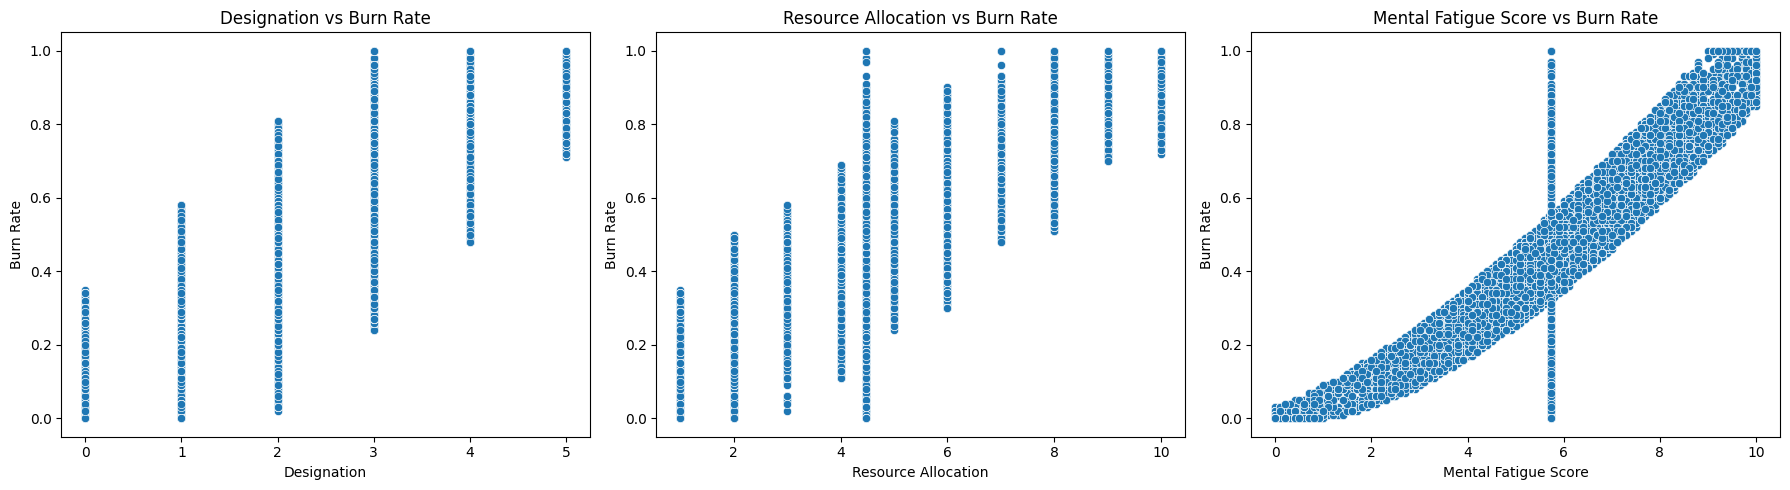

In [127]:

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Designation', y='Burn Rate', data=data)
plt.title('Designation vs Burn Rate')
plt.xlabel('Designation')
plt.ylabel('Burn Rate')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Resource Allocation', y='Burn Rate', data=data)
plt.title('Resource Allocation vs Burn Rate')
plt.xlabel('Resource Allocation')
plt.ylabel('Burn Rate')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Mental Fatigue Score', y='Burn Rate', data=data)
plt.title('Mental Fatigue Score vs Burn Rate')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Burn Rate')
plt.tight_layout()
plt.show()

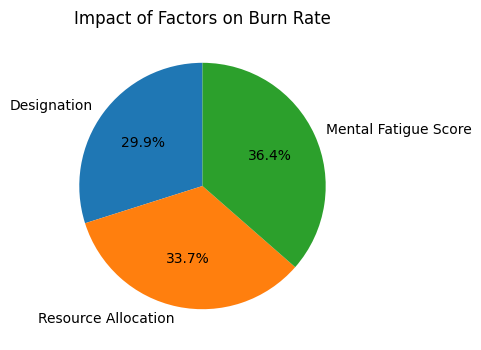

In [128]:
correlations = data[['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']].corr()['Burn Rate'][:-1]
labels = correlations.index
sizes = abs(correlations.values)
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Impact of Factors on Burn Rate')
plt.show()


In [129]:
data=data.drop("Number of Days",axis=1)
data=data.drop("WFH Setup Available",axis=1)
data

,Gender,Company Type,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,2,3.000000,3.800000,0.16
1,1,1,1,2.000000,5.000000,0.36
2,0,0,2,4.483831,5.800000,0.49
3,1,1,1,1.000000,2.600000,0.20
4,0,1,3,7.000000,6.900000,0.52
...,...,...,...,...,...,...
21621,0,1,1,3.000000,5.729851,0.41
21622,0,0,3,6.000000,6.700000,0.59
21623,1,1,3,7.000000,5.729851,0.72
21624,0,1,2,5.000000,5.900000,0.52


**TRAIN-TEST SPLIT**




In [130]:
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns )

In [132]:
X_train

,Gender,Company Type,Designation,Resource Allocation,Mental Fatigue Score
8275,-0.954022,-1.379211,0.725025,0.768001,0.475128
21284,1.048194,0.725052,1.604608,1.270205,1.131455
16802,1.048194,0.725052,-0.154557,0.768001,0.420434
3271,1.048194,-1.379211,1.604608,2.274612,1.733089
5302,-0.954022,-1.379211,-0.154557,-0.236406,0.475128
...,...,...,...,...,...
10955,-0.954022,0.725052,-0.154557,0.768001,0.803292
17289,-0.954022,0.725052,0.725025,-0.236406,-0.509363
5192,-0.954022,0.725052,0.725025,0.265797,-1.165690
12172,1.048194,-1.379211,-1.913723,-1.743017,-1.220384


In [133]:
y_train

8275     0.61
21284    0.81
16802    0.62
3271     0.73
5302     0.43
         ... 
10955    0.58
17289    0.39
5192     0.24
12172    0.18
235      0.00
Name: Burn Rate, Length: 15138, dtype: float64

**MODEL BUILDING**

---



In [134]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [135]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = linear_regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Mean Squared Error: 0.005153980648742615
Root Mean Squared Error: 0.07179122960879424
Mean Absolute Error: 0.054021030186827496
R-squared: 0.8688149838676198


**RESULT GRAPH**

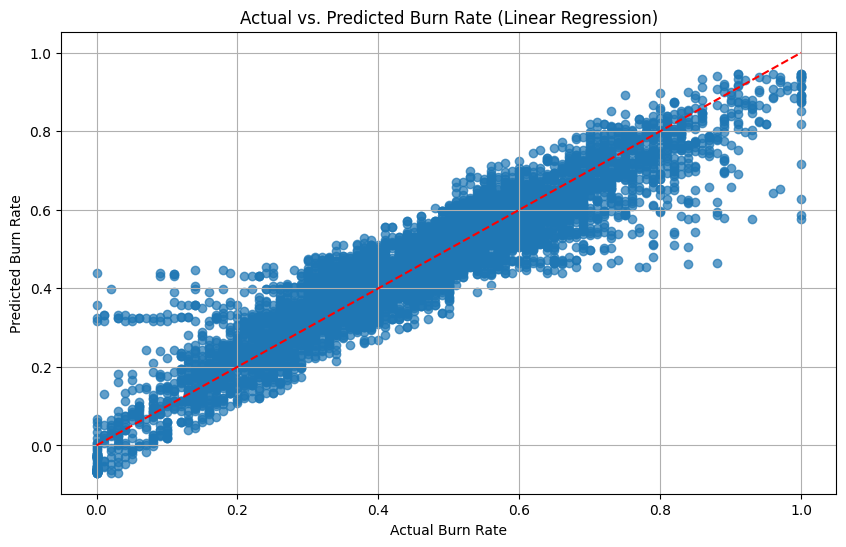

In [136]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Burn Rate')
plt.ylabel('Predicted Burn Rate')
plt.title('Actual vs. Predicted Burn Rate (Linear Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()
